In [467]:
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm
from random import choices

%matplotlib notebook

### Распределения и HMM в Python

Задаём распределения для матрицы переходово, матрицы наблюдений и начальное распределение.

In [468]:
M = 2
K = 6
L = 200
N = 1000

In [469]:
states = np.array([[0.95, 0.05],
                   [0.1,  0.9]])

In [470]:
emis = np.array([[1/6, 0.1],
                 [1/6, 0.1],
                 [1/6, 0.1],
                 [1/6, 0.1],
                 [1/6, 0.1],
                 [1/6, 0.5]
                            ])

In [471]:
start = np.array([0.5, 0.5])

In [472]:
emis = emis.T

In [473]:
emis

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.5       ]])

Ниже описан генератор HMM, основанный на numpy.random.choice, который выдаёт элемент на основе распределения, которое мы задаём для него (в нашем случае матрицы наблюдени, состояний и вектор начального рапсределения)

In [474]:
dices = [0,1]
points = [0, 1, 2, 3, 4, 5]
hid_state = np.zeros(L)
vis_emis = np.zeros(L)

In [475]:
hid_state[0] = np.random.choice(dices, 1, p = start)
for i in range(1,L):
    hid_state[i] = np.random.choice(dices, 1, p=states[int(hid_state[i-1])])
    vis_emis[i] = np.random.choice(points, 1, p=emis[int(hid_state[i-1])])

In [476]:
hid_state

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [477]:
vis_emis

array([0., 5., 5., 1., 4., 5., 2., 1., 3., 4., 3., 0., 3., 0., 0., 5., 1.,
       5., 4., 1., 5., 5., 3., 3., 5., 0., 5., 5., 5., 0., 5., 5., 2., 5.,
       5., 5., 5., 5., 0., 2., 0., 5., 0., 1., 0., 5., 5., 0., 5., 2., 1.,
       2., 0., 5., 5., 2., 2., 3., 4., 0., 3., 5., 2., 1., 2., 1., 5., 5.,
       2., 1., 4., 4., 4., 4., 5., 4., 0., 3., 0., 5., 2., 5., 1., 2., 3.,
       2., 2., 2., 2., 0., 4., 2., 3., 1., 1., 1., 1., 2., 3., 0., 5., 5.,
       5., 5., 4., 5., 4., 5., 2., 5., 5., 4., 4., 0., 3., 5., 3., 4., 3.,
       3., 2., 4., 4., 4., 0., 4., 0., 3., 0., 0., 4., 3., 3., 0., 1., 5.,
       5., 5., 2., 5., 1., 1., 0., 5., 3., 3., 2., 2., 5., 0., 1., 3., 4.,
       0., 1., 1., 1., 0., 5., 2., 2., 5., 2., 1., 5., 5., 2., 3., 1., 3.,
       2., 5., 0., 5., 1., 1., 4., 1., 5., 5., 1., 1., 0., 0., 5., 4., 5.,
       3., 0., 4., 2., 5., 5., 4., 5., 4., 4., 1., 4., 4.])

Так же в Python есть модуль для формирования HMM по начальным матрицам, я воспользовался им, чтобы сравнивать своё апостериорное распределение и прогноз алгоритма Витерби. И с помощью него я формировал начальные вектор переходов и вектор наблюдений $X[1]$ и $X[0]$ соответсвенно.

In [478]:
model = hmm.MultinomialHMM(n_components=M)

In [479]:
model.startprob_ = start

In [480]:
model.transmat_ = states

In [481]:
model.emissionprob_ = emis

In [482]:
X=model.sample(L)

### Алгоритм Витерби

для j = 0: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][1]\cdot states[1,0], MK[i-1][j]\cdot states[j, j])$$
для j = 1: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][0]\cdot states[0,1], MK[i-1][j]\cdot states[j, j])$$
$X[0]$ - сгенерированный вектор наблюдений

$MK$ - матрица вероятностей для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [483]:
MK = np.zeros((L, M))

#MK1 = np.zeros((L, M))

In [484]:
for j in range(M):
    MK[0, j] = emis[j, X[0][0]]*start[j]
    #MK1[0, j] = math.log2(emis[j, X[0][0]])+math.log2(start[j])

In [485]:
for i in range(1, L):
    for j in range(M):
        if j == 0:
            MK[i, j] = emis[j, X[0][i]]*max(MK[i-1][1]*states[1,0], MK[i-1][j]*states[j, j])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][1]+math.log2(states[1,0]), 
            #                                                      MK1[i-1][0]+math.log2(states[0, 0])))
        if j == 1:
            MK[i, j] =emis[j, X[0][i]]*max(MK[i-1][0]*states[0,1], MK[i-1][j]*states[j,j])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][0]+math.log2(states[0,1]), 
            #                                                      MK1[i-1][1]+math.log2(states[1, 1])))
    

In [486]:
#MK

Можно сравнить то, что мы получили из Витерби с сгенерированным и с предсказанием питоновского модуля

In [487]:
#X[1]

In [488]:
myvit = np.argmax(MK, axis = 1)
#myvit

In [489]:
#model.decode(X[0])[1]

<IPython.core.display.Javascript object>


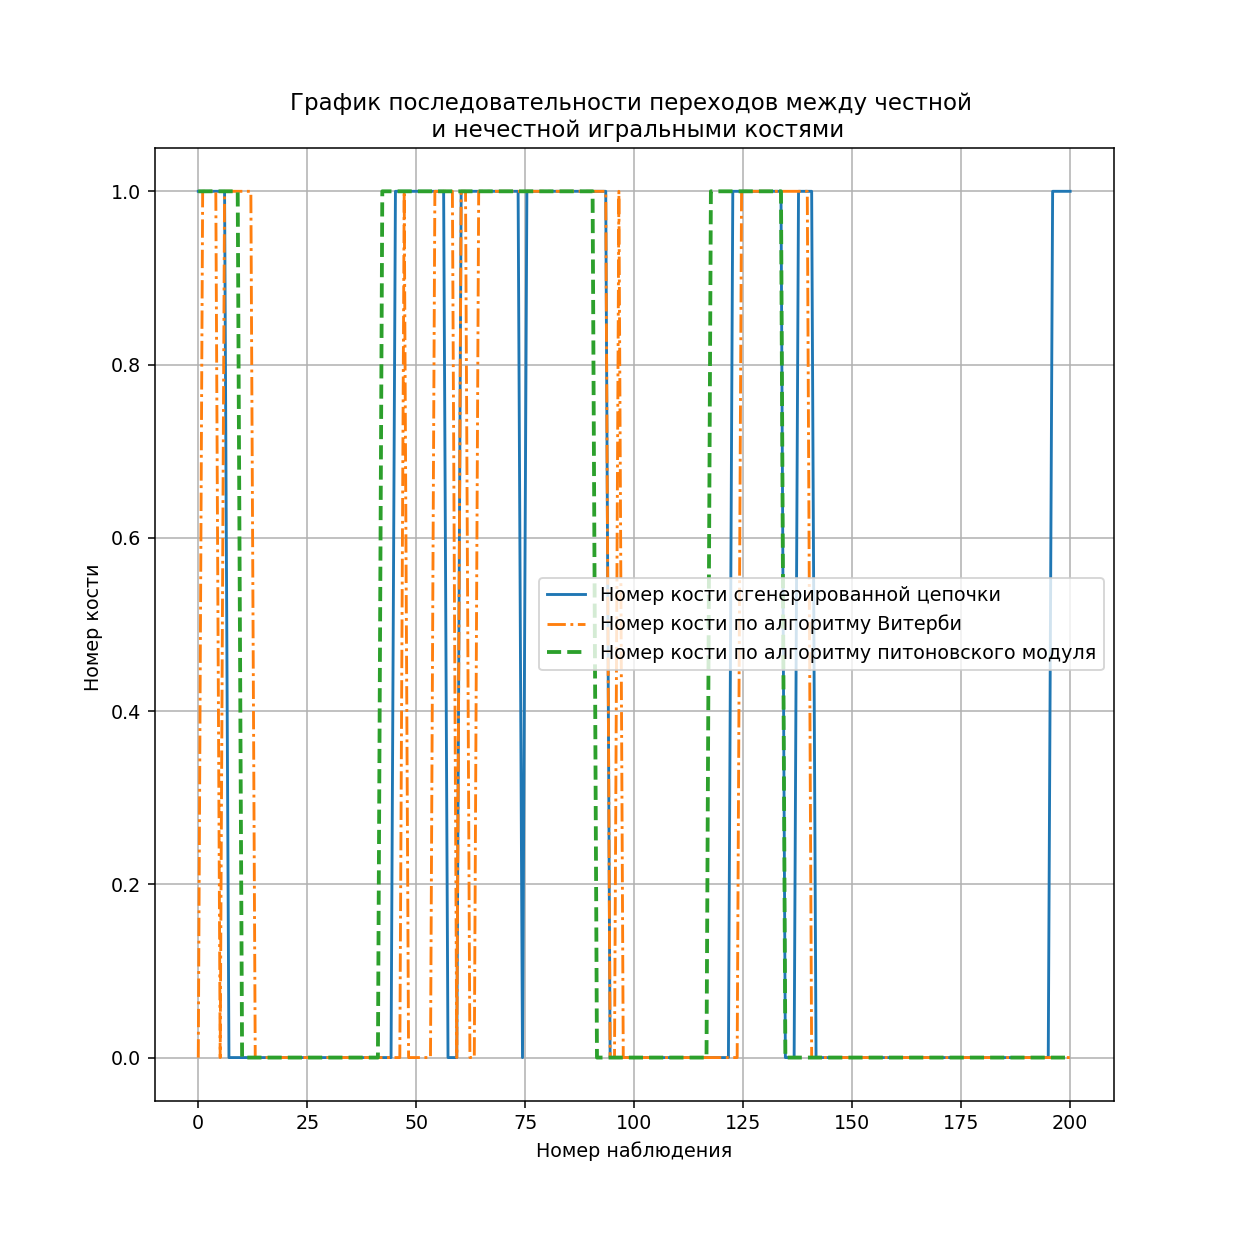

In [490]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(9, 9))
ax.set_title('График последовательности переходов между честной \n и нечестной игральными костями')
ax.set_ylabel('Номер кости ')
ax.set_xlabel('Номер наблюдения')
ax.plot(s, X[1], label = 'Номер кости сгенерированной цепочки ')
ax.plot(s, np.argmax(MK, axis = 1), '-.', label = 'Номер кости по алгоритму Витерби')
ax.plot(s, model.decode(X[0])[1],'--', label = 'Номер кости по алгоритму питоновского модуля', linewidth=2 )
ax.legend()
ax.grid()

### Алгоритм прямого хода

для j = 0: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][1]\cdot states[1,j]\cdot emis[j, X[0][i-1]]$$
для j = 1: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][0]\cdot states[0,j]\cdot emis[j, X[0][i-1]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU$ - матрица вероятностей алгоритма прямого хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов


По вашему совету, я решил сгенерировать 1000 цепочек длинной L(=200) и посмотреть на распределение вероятностей этих последовательностей. 
Изначально я хотел построить гистограмму, но в matplotlib'е какие-то проблеммы с логарифмической шкалой для гистограмм, так что можно посмотреть в принципе на график их распределения

In [491]:

PU = np.zeros((L+1, M))
#PU1 = np.zeros((L+1, M))
PU[0] = start
#PU1[0][0] = math.log2(start[0])
#PU1[0][1] = math.log2(start[1])

In [492]:
for j in range(M):
    PU[1, j] = emis[j, X[1][0]]*start[j]
    #PU1[1, j] = math.log2(emis[j, X[1][0]]) + math.log2(start[j])

In [493]:
for i in range(2, L+1):
    for j in range(M):
            if j == 0:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][1]*states[1,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[1,j]) + math.log2(emis[j, X[0][i-1]])
            if j == 1:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][0]*states[0,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[0,j]) + math.log2(emis[j, X[0][i-1]])

In [494]:
check = np.zeros(N)
for s in range(N):
    X=model.sample(L)
    PU = np.zeros((L+1, M))
    PU[0] = start
    for q in range(M):
        PU[1, q] = emis[q, X[1][0]]*start[q]
    for i in range(2, L+1):
        for j in range(M):
                if j == 0:
                    PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][1]*states[1,j]*emis[j, X[0][i-1]]
                    #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                    #+ PU1[i-1][1] + math.log2(states[1,j]) + math.log2(emis[j, X[0][i-1]])
                if j == 1:
                    PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][0]*states[0,j]*emis[j, X[0][i-1]]
    check[s] = sum(PU[-1])

In [495]:
#fig, ax = plt.subplots(1,1,figsize=(9, 9))
#ax.hist(check, bins=100, log = True)
#ax.set_xlim(0, 100)
#ax.set_ylim(min(check), max(check))
#ax.grid(True)
#ax.set_yscale('log', nonposy='clip')


<IPython.core.display.Javascript object>


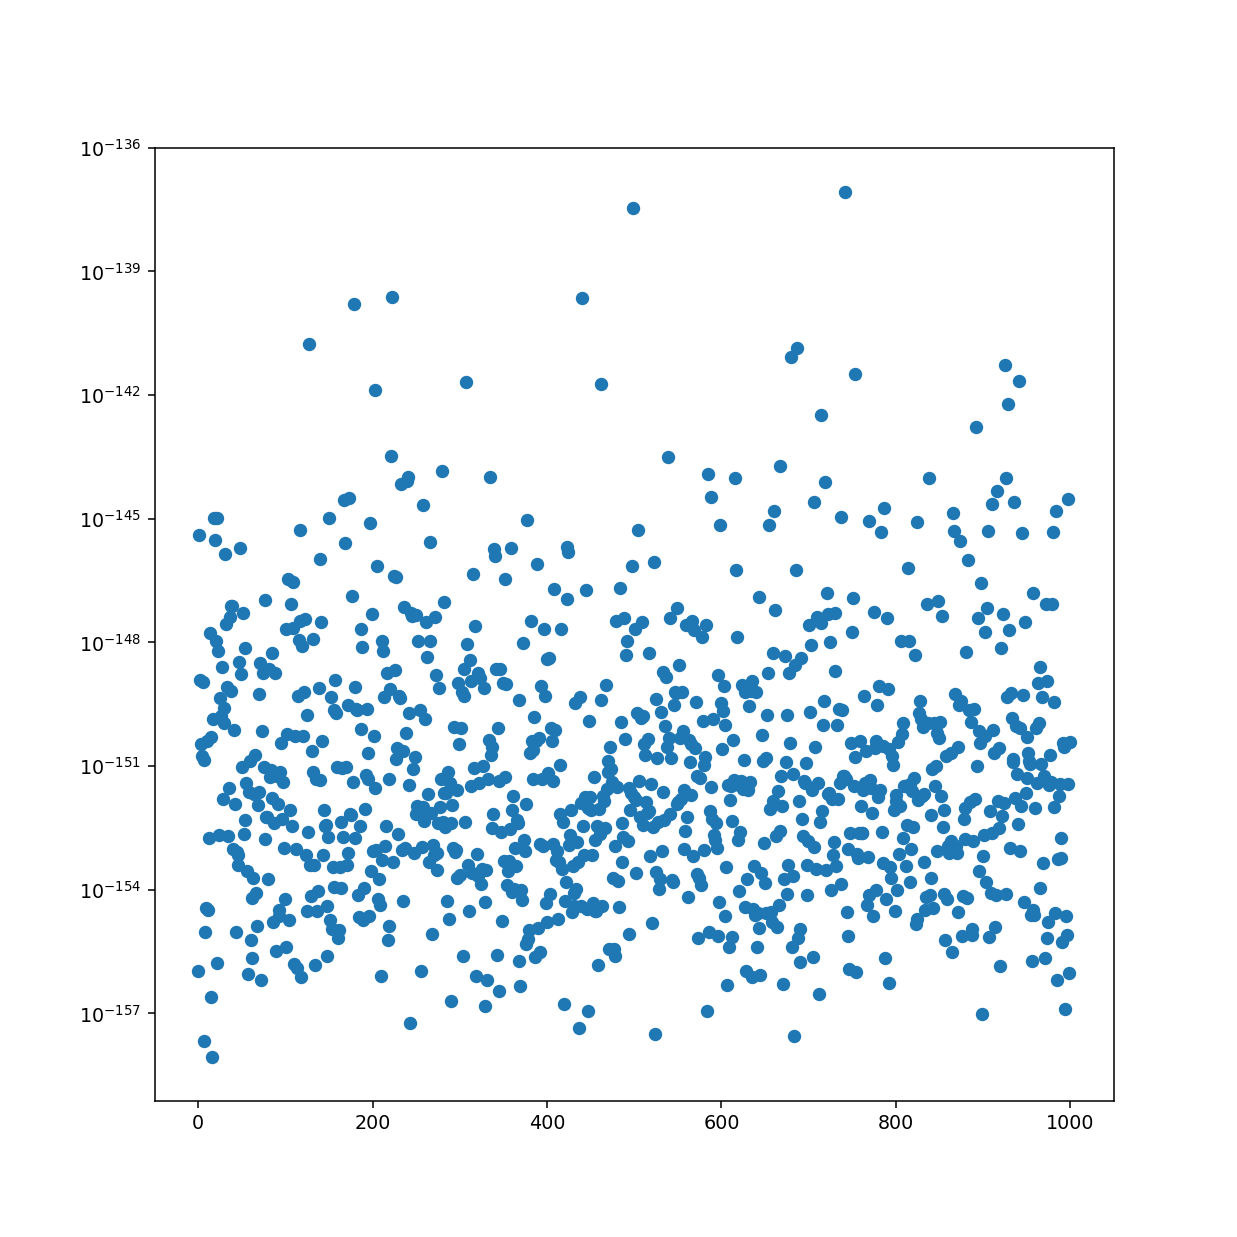

In [496]:
xx = np.linspace(0, N, N)
fig, ax = plt.subplots(1,1,figsize=(9, 9))
ax.set_yscale('log')
ax.scatter(xx, check)

### Алгоритм обратного хода

для j = 0: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][1]\cdot states[j, 1]\cdot emis[j, X[0][i]]$$
для j = 1: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][0]\cdot states[j, 0]\cdot emis[j, X[0][i]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU_b$ - матрица вероятностей алгоритма обратного хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [497]:
PU_b = np.zeros((L+1, M))
#PU_b1 = np.zeros((L+1, M))

In [498]:
for j in range(M):
    PU_b[L, j] = 1
   # PU_b1[L, j] = math.log2(1)

In [499]:
for i in range(L-1,-1,-1):
    for j in range(M):
            if j == 0:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][1]*states[j, 1]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # + PU_b1[i+1][1] + math.log2(states[j, 1]) + math.log2(emis[j, X[0][i]])
            if j == 1:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][0]*states[j, 0]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # +PU_b1[i+1][1] + math.log2(states[j, 0]) + math.log2(emis[j, X[0][i]])

Вероятность существования цепочки по алгоритму прямого хода

In [500]:
sum(PU[-1])

3.798040272130174e-151

Вероятность существования цепочки по алгоритму обратного хода

In [501]:
sum(PU_b[0]*start)

3.798040272130166e-151

Всё верно, так как эти вероятности должны быть равны, но опять же стоит иметь в виду, что для расчёта нужно применять логарфмирование, т.к. теряется точность и они могут оказаться неравны из-за чего апостериорное распределение может быть посчитано неверно

### Апостериорное распределение

Матрица апостериорного распределения $Pd$

In [502]:
Pd = np.zeros((L, M))

In [503]:
for i in range(L):
    for j in range(M):
        Pd[i, j] = (PU[i,j]*PU_b[i,j])/sum(PU[-1])

In [504]:
Pd

array([[0.36555965, 0.63444035],
       [0.32486312, 0.68327619],
       [0.32485986, 0.68328596],
       [0.37844799, 0.52252158],
       [0.53817427, 0.42668581],
       [0.6116812 , 0.38258165],
       [0.62492681, 0.37463429],
       [0.64446905, 0.31600756],
       [0.7223631 , 0.26927113],
       [0.74606683, 0.25504889],
       [0.72395093, 0.26831843],
       [0.64820543, 0.31376573],
       [0.62953977, 0.3697627 ],
       [0.66428683, 0.26552152],
       [0.7822079 , 0.19476888],
       [0.83990396, 0.16015124],
       [0.85774966, 0.14944382],
       [0.84204697, 0.15886544],
       [0.84900387, 0.13799473],
       [0.89715165, 0.10910606],
       [0.91391228, 0.09904969],
       [0.90520455, 0.10427432],
       [0.86795346, 0.12662498],
       [0.78900425, 0.1739945 ],
       [0.76978393, 0.23165545],
       [0.75909486, 0.23806889],
       [0.70073668, 0.2730838 ],
       [0.68938203, 0.30714775],
       [0.69478524, 0.30390583],
       [0.64899189, 0.33138184],
       [0.

In [505]:
model.predict_proba(X[0])

array([[0.36555965, 0.63444035],
       [0.32811175, 0.67188825],
       [0.36554776, 0.63445224],
       [0.52370841, 0.47629159],
       [0.60353992, 0.39646008],
       [0.63323374, 0.36676626],
       [0.62327587, 0.37672413],
       [0.70456292, 0.29543708],
       [0.739338  , 0.260662  ],
       [0.73988149, 0.26011851],
       [0.7063853 , 0.2936147 ],
       [0.6270207 , 0.3729793 ],
       [0.63825565, 0.36174435],
       [0.75384747, 0.24615253],
       [0.81395803, 0.18604197],
       [0.83981461, 0.16018539],
       [0.84054812, 0.15945188],
       [0.8164176 , 0.1835824 ],
       [0.86594082, 0.13405918],
       [0.88815779, 0.11184221],
       [0.89091415, 0.10908585],
       [0.87518328, 0.12481672],
       [0.83541003, 0.16458997],
       [0.75754896, 0.24245104],
       [0.76525587, 0.23474413],
       [0.74162225, 0.25837775],
       [0.67830218, 0.32169782],
       [0.70017777, 0.29982223],
       [0.68635296, 0.31364704],
       [0.63194569, 0.36805431],
       [0.

   Стоит отметить, что моё апостериорное распределение равно с небольшой погрешностью апостеорному распределение питоновского модуля.
   
   Так же стоит отметить, что точность теряется из-за того, что я не стал применять логарифмирование.

Небольшая фун-ция для подсчёта ошибок

In [506]:
fal = 0
fal1 = 0
fal2 = 0
fal3 = 0
for i in range(L):
    if X[1][i]!=model.predict(X[0])[i]:
        fal +=1
    if X[1][i]!=np.argmax(model.predict_proba(X[0]), axis = 1)[i]:
        fal1 +=1
    if X[1][i]!=myvit[i]:
        fal2 +=1
    if X[1][i]!=np.argmax(Pd, axis=1)[i]:
        fal3 +=1

In [507]:
print("Процент ошибок в алгоритме питоновского модуля",fal/L)
print("Процент ошибок в апостериорном распределении питоновского модуля",fal1/L)
print("Процент ошибок в моём алгоритме Витерби", fal2/L)
print("Процент ошибок в моём апостериорном распределении", fal3/L)

Процент ошибок в алгоритме питоновского модуля 0.24
Процент ошибок в апостериорном распределении питоновского модуля 0.235
Процент ошибок в моём алгоритме Витерби 0.57
Процент ошибок в моём апостериорном распределении 0.23


<IPython.core.display.Javascript object>


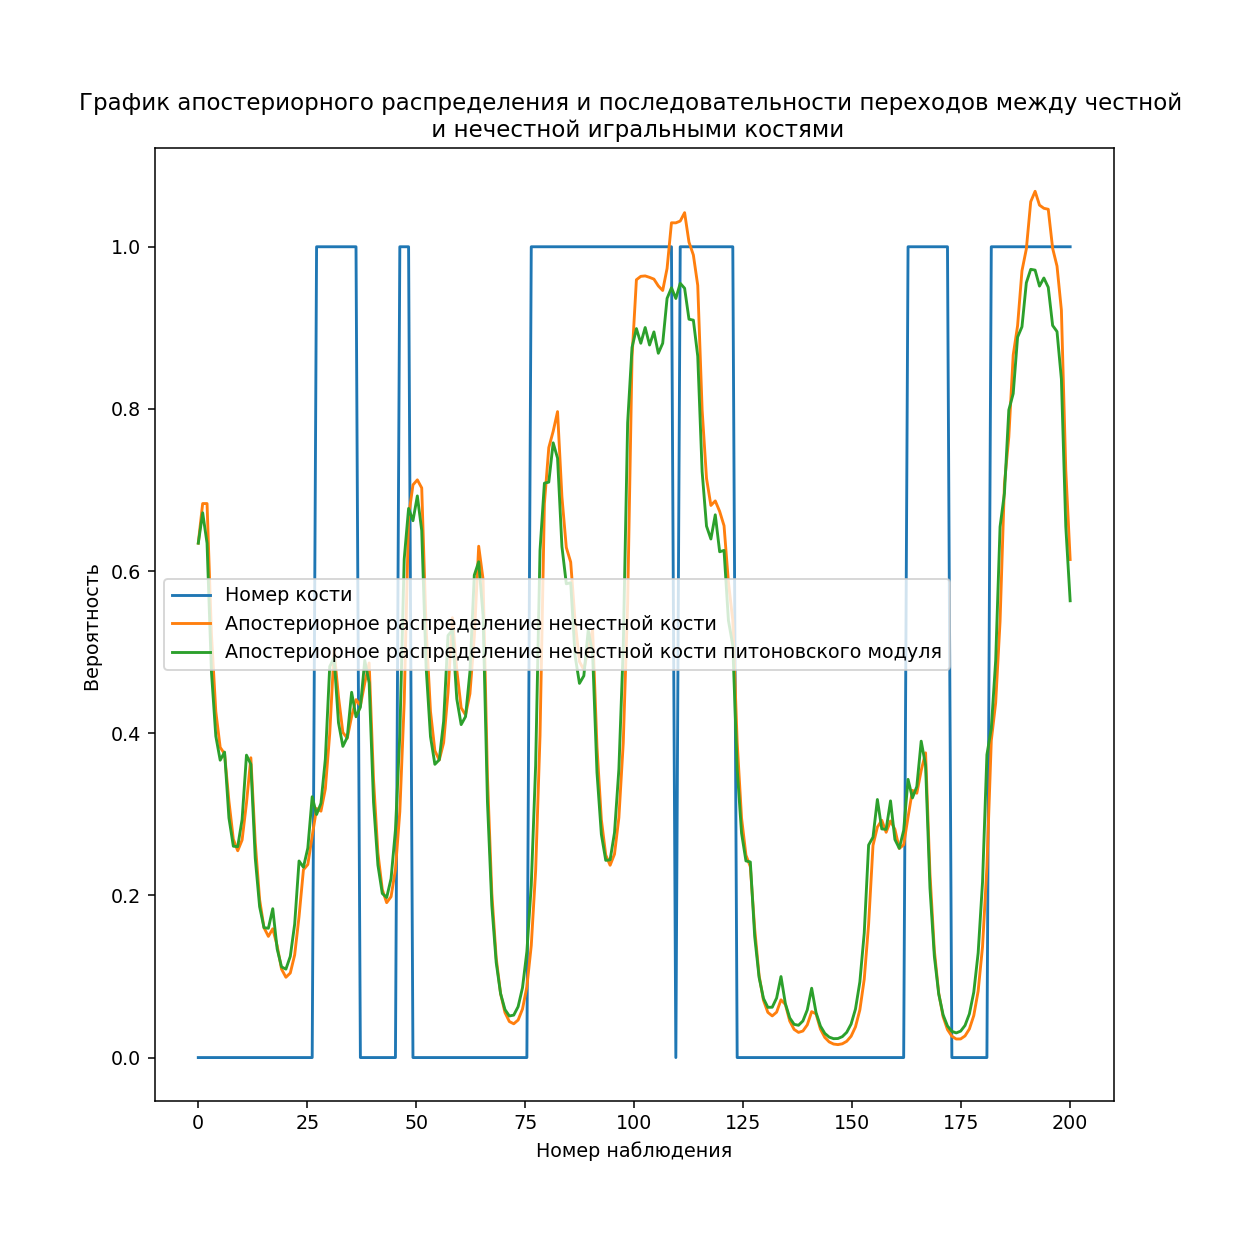

In [508]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(9, 9))
ax.set_title('График апостериорного распределения и последовательности переходов между честной \n и нечестной игральными костями')
ax.set_ylabel('Вероятность ')
ax.set_xlabel('Номер наблюдения')
ax.plot(s, X[1], label = 'Номер кости')
#ax.scatter(s, X[0]/5, label = 'Кол-во очков разделённое на 5', color='r')
ax.plot(s, Pd[::, 1], label = 'Апостериорное распределение нечестной кости')
ax.plot(s, model.predict_proba(X[0])[::, 1], label = 'Апостериорное распределение нечестной кости питоновского модуля')
ax.legend()

### Результаты

В результате с помощью алгоритма Витерби была сгенерирована наиболее вероятная последовательность переходов по последовательности наблюдений. По алготимам прямого и обратного ходов были найдены вероятности существавания данной последовательности наблюдений и восстановленно апостериорное распределение. Результаты были сравнены с исходной последовательностью наблюдений и с алгоритмами представленными в модули hmmlearn.